Introduction to Python
================================

Lesson 3 - Part1
--------

## Summary 

In this lesson we will explore a little more in dept some aspects of Keras and neural networks.
The topis that we'll cover in this lesson are:

  - Dropout
  - Grid Search
  - 

## Droptout

Dropout is a method often used on neural networks in order to avoid/reduce orverfitting.

The idea is to randomly shut down some neurons at each iteration in order to make them less relevant for the network.   

For this dropout is a layer itself, as you can see from the [Keras docs](https://keras.io/layers/core/), that we put on top of another layer.

Let's see how we can improve the network that we have created for the **mnist** classification task last lesson.

## Re-factoring

In order to improve the code even more, we'll make a little bit of re-factoring and re-write it using Python Classes.

**NOTE**: please note how the names of classes and function are written. As you can see 

  - every class has a name that starts with a **uppercase** letter
  - every function has a name that starts with a **lowercase** letter
  
This is due to a style convention used in Python coding called [pep8](https://www.python.org/dev/peps/pep-0008/).

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Train on 55000 samples, validate on 10000 samples
Epoch 1/1
10000/10000 [==============================] - 1s 56us/step

acc: 96.19%
['loss', 'acc']


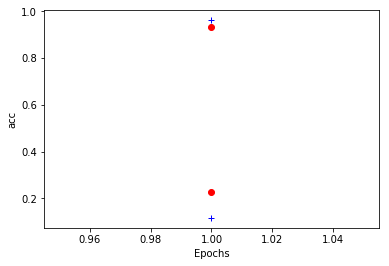

In [20]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import advanced_activations
from keras.optimizers import Adam
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt

# Parameters
learning_rate = 0.001
num_steps = 1
batch_size = 128

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 # 2nd layer number of neurons
num_input = 784 # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

metrics = ['accuracy']


class PrepareVariabiles:
    def __init__(self):
        self.mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
        
        
    def splitDatset(self):
        X = self.mnist.train.images
        Y = self.mnist.train.labels
        X_test = self.mnist.test.images
        Y_test = self.mnist.test.labels
        return X,Y,X_test,Y_test
    
class CreateNN:
    def __init__(self,**kargs):
        self.activationFun = 'relu'
        self.dropPerc = 0.15
        self.X = kargs['x']
        self.Y = kargs['y']
        self.X_test = kargs['xt']
        self.Y_test = kargs['yt']
        
        
    def modelDefinition(self,useDropout=False):
        self.model = Sequential()
        self.model.add(Dense(num_input, input_dim=num_input,activation=self.activationFun))
        self.model.add(Dense(n_hidden_1,activation=self.activationFun))
        if useDropout:
            self.model.add(Dropout(self.dropPerc))
        self.model.add(Dense(n_hidden_2,activation=self.activationFun))
        if useDropout:
            self.model.add(Dropout(self.dropPerc))
        self.model.add(Dense(num_classes,activation='softmax'))
        
    def modelCompile(self):
        adam = Adam(lr=learning_rate)
        self.model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=metrics)
        
    def modelEval(self):
        history = self.model.fit(self.X, self.Y, epochs=num_steps, batch_size=batch_size,validation_data=(self.X_test,self.Y_test))#validation_split=0.05
        scores = self.model.evaluate(self.X_test, self.Y_test)
        return history,scores,self.model
    
class PlotGraphs:
    def __init__(self,**kargs):
        history= kargs['h']
        self.history_dict = history.history
        self.metList = []
        for cur_key in history.history.keys():
            if len(cur_key.split('_'))==1:
                self.metList.append(cur_key)
        print(self.metList)
    
    def plotResults(self):
        for cur_met in self.metList:
            loss_values = self.history_dict[cur_met]
            val_loss_values = self.history_dict['val_%s'%cur_met]
            epochs = range(1, len(loss_values) + 1)
            plt.plot(epochs, loss_values, 'ro')
            plt.plot(epochs, val_loss_values, 'b+')
            plt.xlabel('Epochs')
            plt.ylabel(cur_met)


def main():
    pv = PrepareVariabiles()
    X, Y, X_test, Y_test = pv.splitDatset()
    cnn = CreateNN(x=X,y=Y,xt=X_test,yt=Y_test)
    cnn.modelDefinition()
    cnn.modelCompile()
    history, scores, model = cnn.modelEval()
    print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    pg = PlotGraphs(h=history)
    pg.plotResults()
    return history
history = main()

In [14]:
history.history
for cur_key in history.history.keys():
    if len(cur_key.split('_'))==1:
        print(cur_key)

loss
acc


['val_loss', 'val_acc', 'loss', 'acc']